# Assignment 11: DECISION TREE

1. Data Preparation:
Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_excel("heart_disease.xlsx")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


# 2. Exploratory Data Analysis (EDA):
   
Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, and inconsistencies in the data.
Visualize the distribution of features, including histograms, box plots, and correlation matrices.


In [61]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [62]:
# Outliers
num_df = df.select_dtypes(include=['int64', 'float64'])

Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((num_df < (Q1 - 1.5 * IQR)) |
            (num_df > (Q3 + 1.5 * IQR)))

outliers.sum()

age           1
trestbps     22
chol        187
thalch        1
oldpeak      16
num           0
dtype: int64

In [63]:
#Data Inconsistencies

df.describe()
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [64]:
df.drop_duplicates(inplace=True)

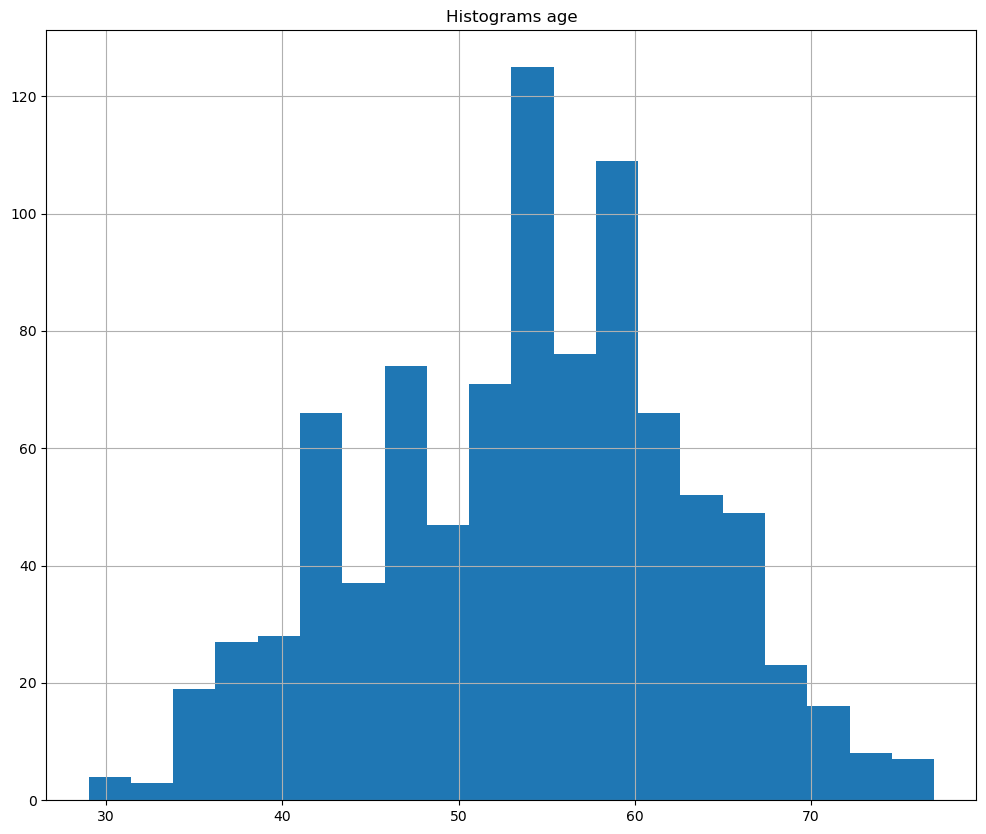

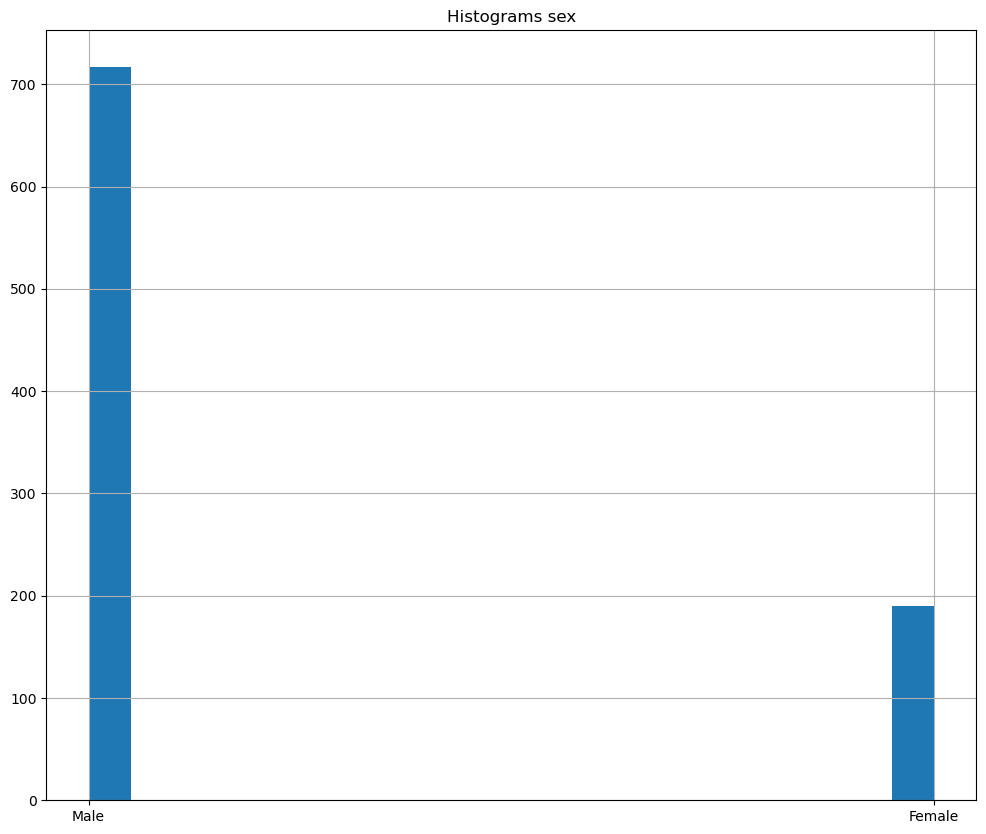

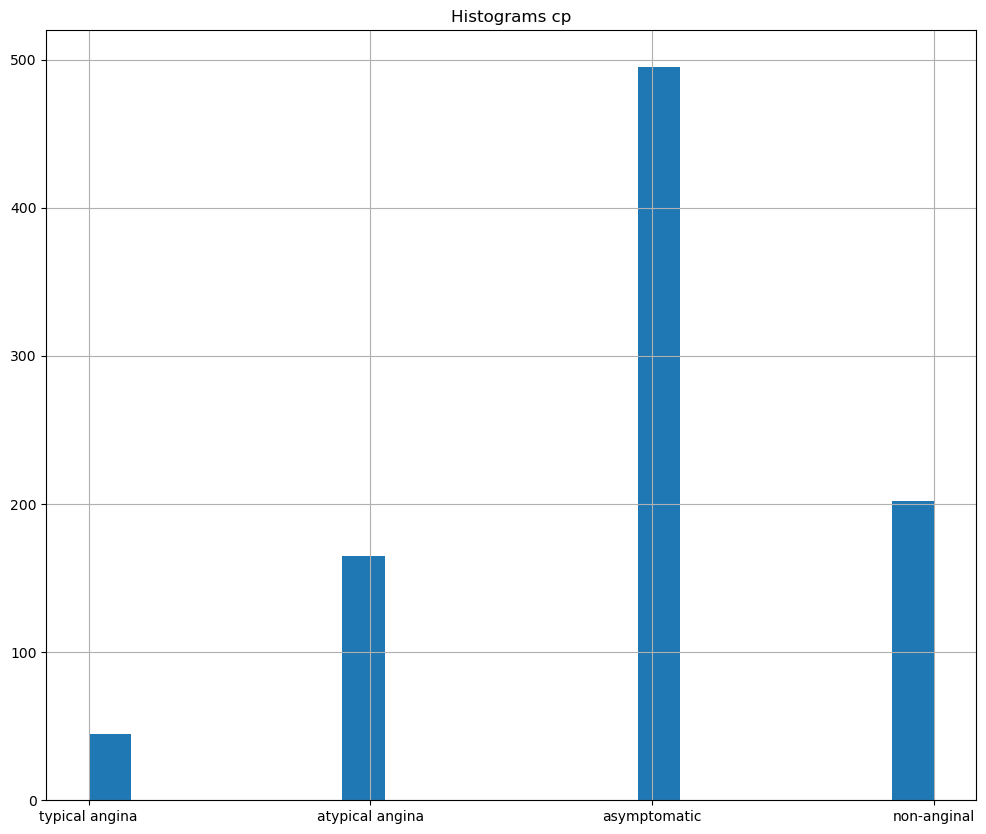

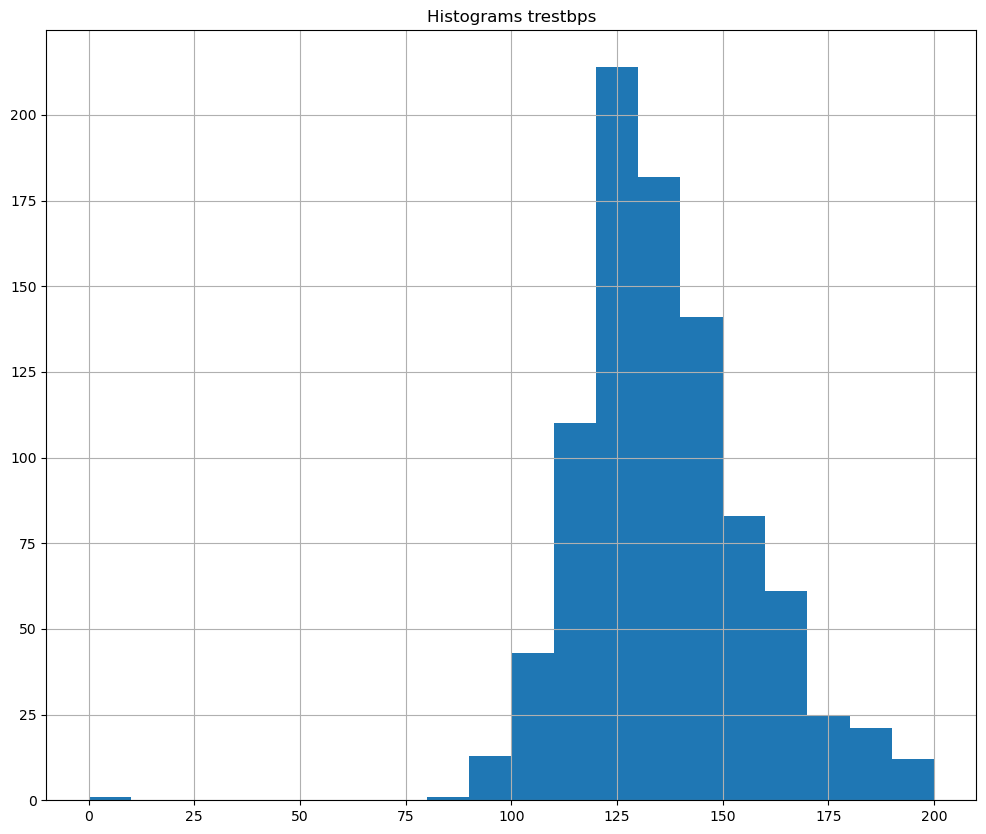

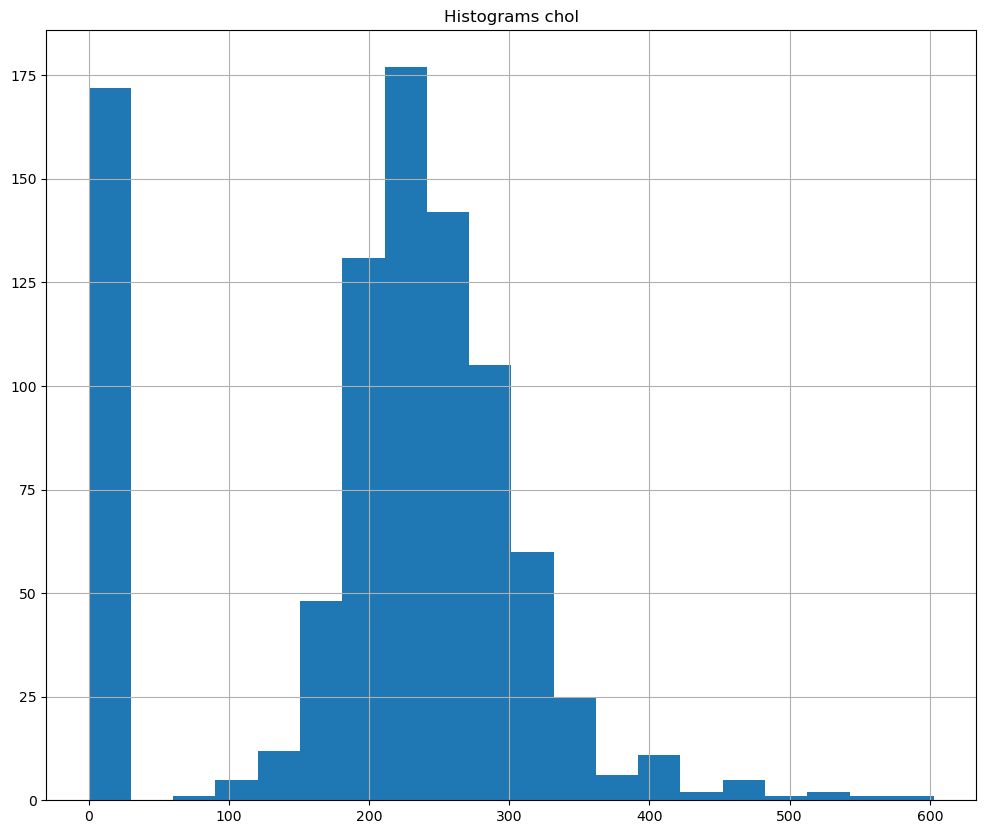

C:\Users\lenovo\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:7132: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

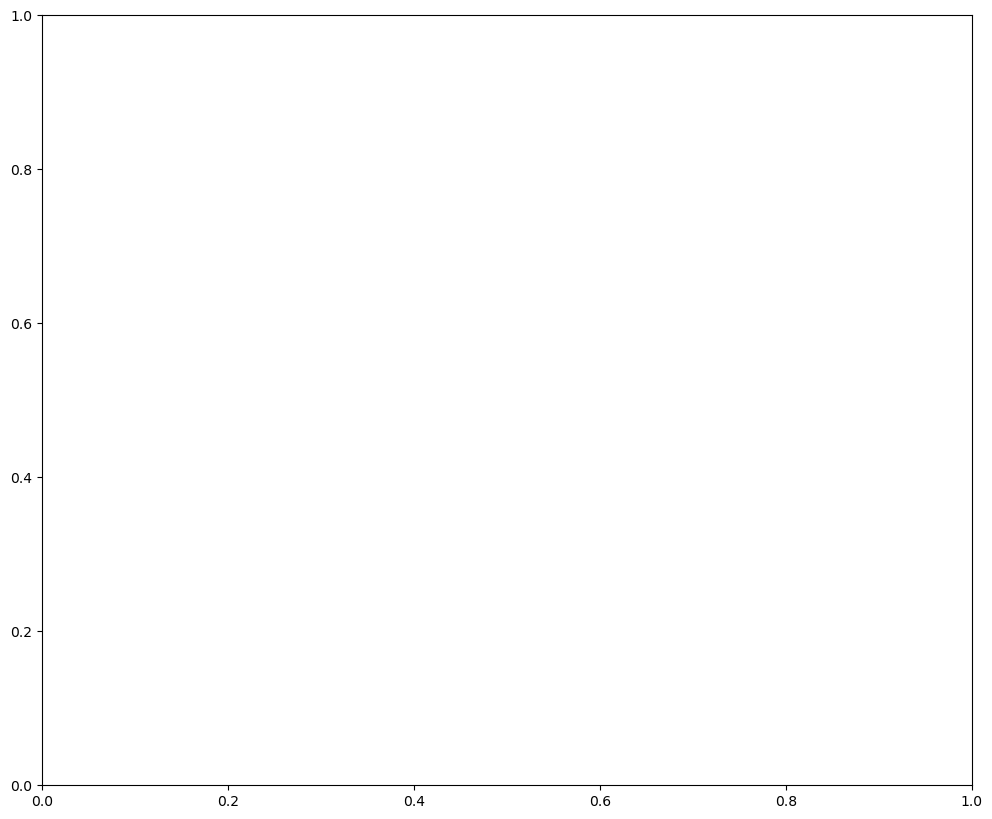

In [65]:
#Visualize the distribution of features, including histograms, box plots, and correlation matrices

num_col = df.columns
#Histograms
for col in num_col:
    df[col].hist(figsize=(12,10), bins=20)
    plt.title(f'Histograms {col}')
    plt.show()

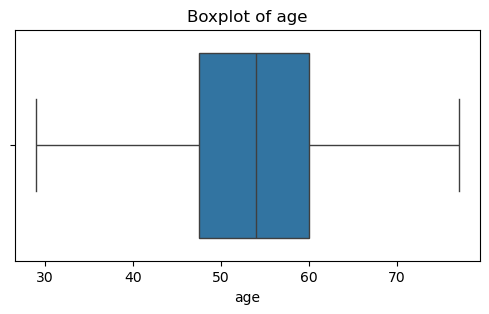

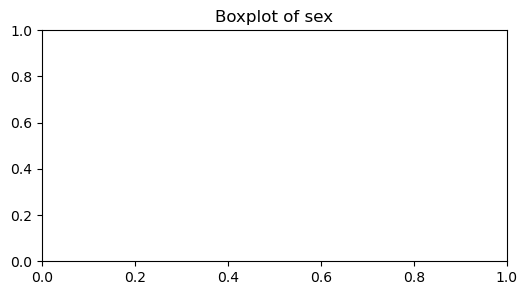

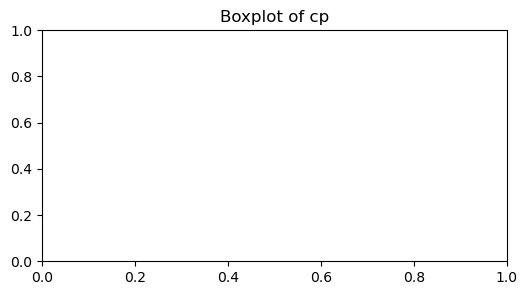

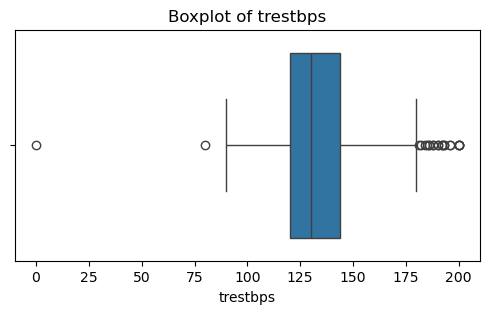

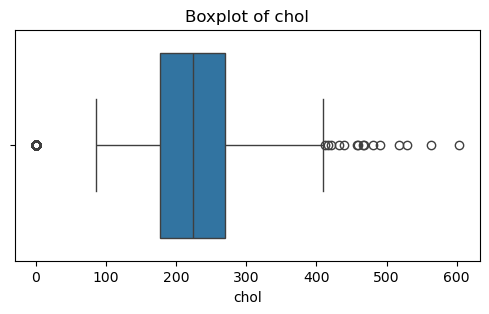

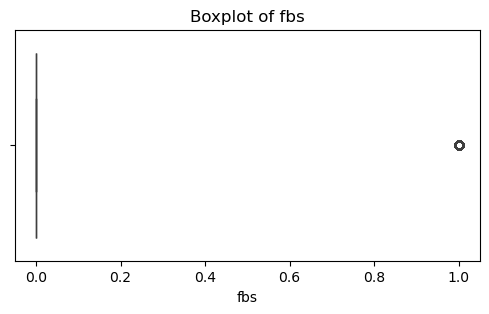

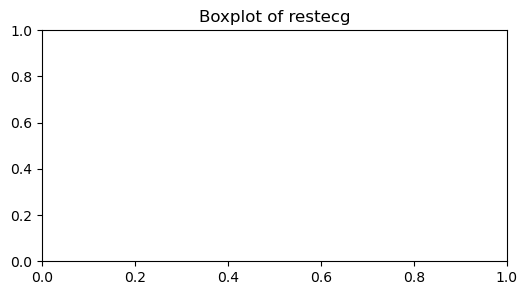

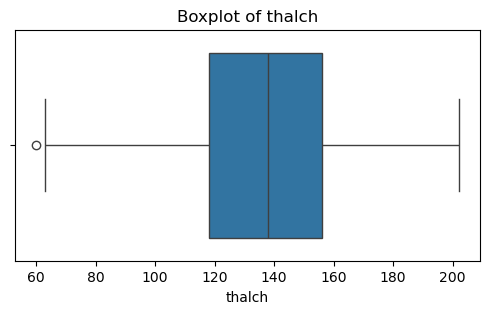

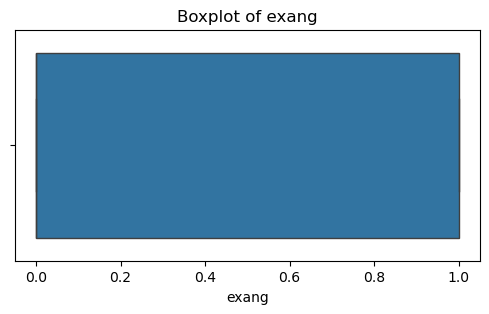

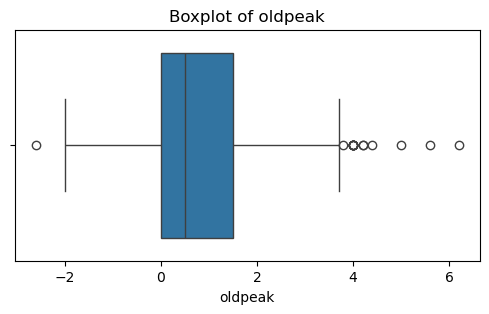

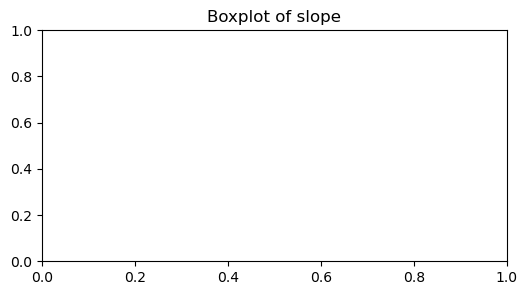

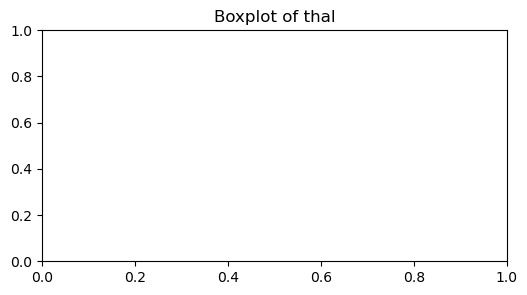

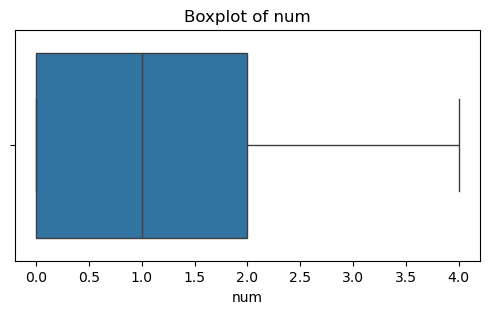

In [66]:
# Boxplot
for col in num_col:
    plt.figure(figsize=(6,3))
    # Convert column to numeric, coercing errors to NaN
    numeric_data = pd.to_numeric(df[col], errors='coerce')
    # Drop NaN values to avoid plotting errors
    numeric_data = numeric_data.dropna()
    # Create boxplot with numeric data only
    sns.boxplot(x=numeric_data)
    plt.title(f"Boxplot of {col}")
    plt.show()

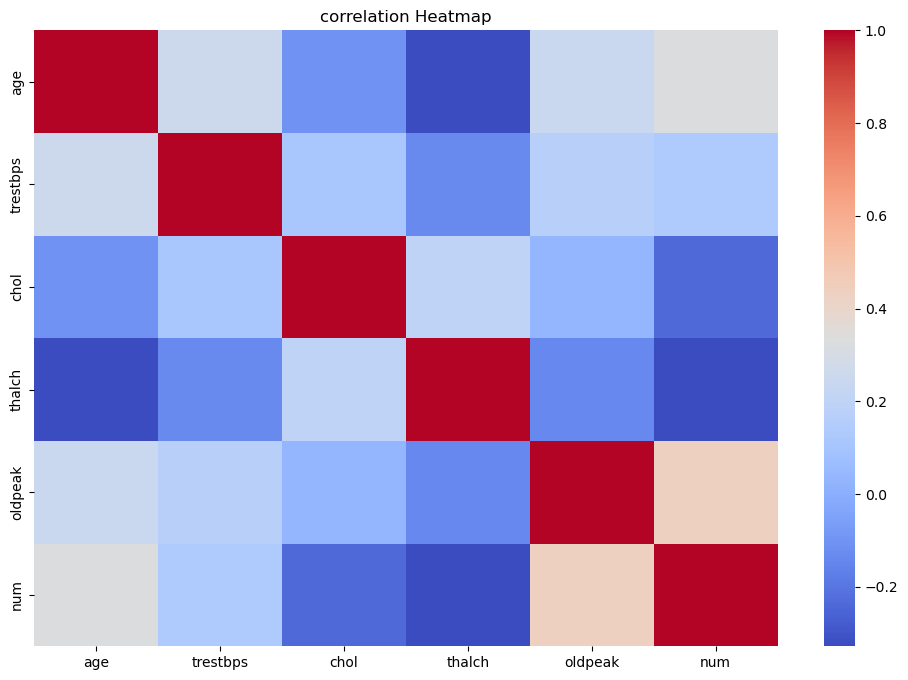

In [37]:
# Correlation Matrices
plt.figure(figsize=(12,8))
corr = numeric_df.corr()
sns.heatmap(corr,annot=False,cmap='coolwarm')
plt.title('correlation Heatmap')
plt.show()

# 3. Feature Engineering:

If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.

In [68]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# First convert all columns to string type to ensure uniform data type
df["sex"] = df["sex"].astype(str)
df["cp"] = df["cp"].astype(str)
df["fbs"] = df["fbs"].astype(str)
df["restecg"] = df["restecg"].astype(str)
df["slope"] = df["slope"].astype(str)
df["thal"] = df["thal"].astype(str)
df["exang"] = df["exang"].astype(str)

# Now apply label encoding
LE = LabelEncoder()
df["sex"] = LE.fit_transform(df["sex"])
df["cp"] = LE.fit_transform(df["cp"])
df["fbs"] = LE.fit_transform(df["fbs"])
df["restecg"] = LE.fit_transform(df["restecg"])
df["slope"] = LE.fit_transform(df["slope"])
df["thal"] = LE.fit_transform(df["thal"])
df['exang'] = LE.fit_transform(df['exang'])

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0,0
4,57,1,0,110,201,0,1,126,3,1.5,1,0,0


In [69]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [70]:
# Handle missing data
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())

In [71]:
# data partion
X = df.drop('num', axis=1)
y = df['num']

In [72]:
from sklearn.preprocessing import StandardScaler   
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Decision Tree Classification:

Split the dataset into training and testing sets (e.g., using an 80-20 split).
Implement a Decision Tree Classification model using a library like scikit-learn.
Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).


In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2)

In [76]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini')

In [78]:
DT.fit(X_train,Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [79]:
Y_pred_train = DT.predict(X_train)
Y_pred_test = DT.predict(X_test)

In [82]:
# Accuracy
from sklearn.metrics import accuracy_score
training_accuracy  = accuracy_score(Y_train, Y_pred_train)
test_accuracy  = accuracy_score(Y_test, Y_pred_test)

In [83]:
print("training accuracy:", np.round(training_accuracy,2))
print("test accuracy:", np.round(test_accuracy,2))

training accuracy: 1.0
test accuracy: 0.49


In [90]:
# Precision
from sklearn.metrics import precision_score
training_precision = precision_score(Y_train, Y_pred_train, average='macro')
test_precision = precision_score(Y_test, Y_pred_test, average='macro')

print("Training Precision:", np.round(training_precision, 2))
print("Test Precision:", np.round(test_precision, 2))

Training Precision: 1.0
Test Precision: 0.37


In [91]:
# Recall
from sklearn.metrics import recall_score
training_recall = recall_score(Y_train, Y_pred_train, average='macro')
test_recall = recall_score(Y_test, Y_pred_test, average='macro')

print("Training Recall:", np.round(training_recall, 2))
print("Test Recall:", np.round(test_recall, 2))

Training Recall: 1.0
Test Recall: 0.35


In [95]:
# F1 Score
from sklearn.metrics import f1_score 
training_f1 = f1_score(Y_train, Y_pred_train, average='macro')
test_f1 = f1_score(Y_test, Y_pred_test, average='macro')

print("Training F1 Score:", np.round(training_f1, 2))
print("Test F1 Score:", np.round(test_f1, 2))

Training F1 Score: 1.0
Test F1 Score: 0.35


In [101]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(Y_test, Y_pred_test)
print(cm1)
specificity = np.round(cm1[0,0]/(cm1[0,0]+cm1[0,1]),2)
print(f"Specificity: {specificity}")

[[51 12  3  9  0]
 [10 28  7 13  0]
 [ 5  7  3  7  2]
 [ 1  8  2  6  1]
 [ 1  1  3  1  1]]
Specificity: 0.81


# 5. Hyperparameter Tuning:

Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.


In [109]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_leaf=3)

# 6. Model Evaluation and Analysis:

Analyse the performance of the Decision Tree model using the evaluation metrics obtained.

Visualize the decision tree structure to understand the rules learned by the model and identify important features


In [117]:
class_names = DT.classes_.astype(str)

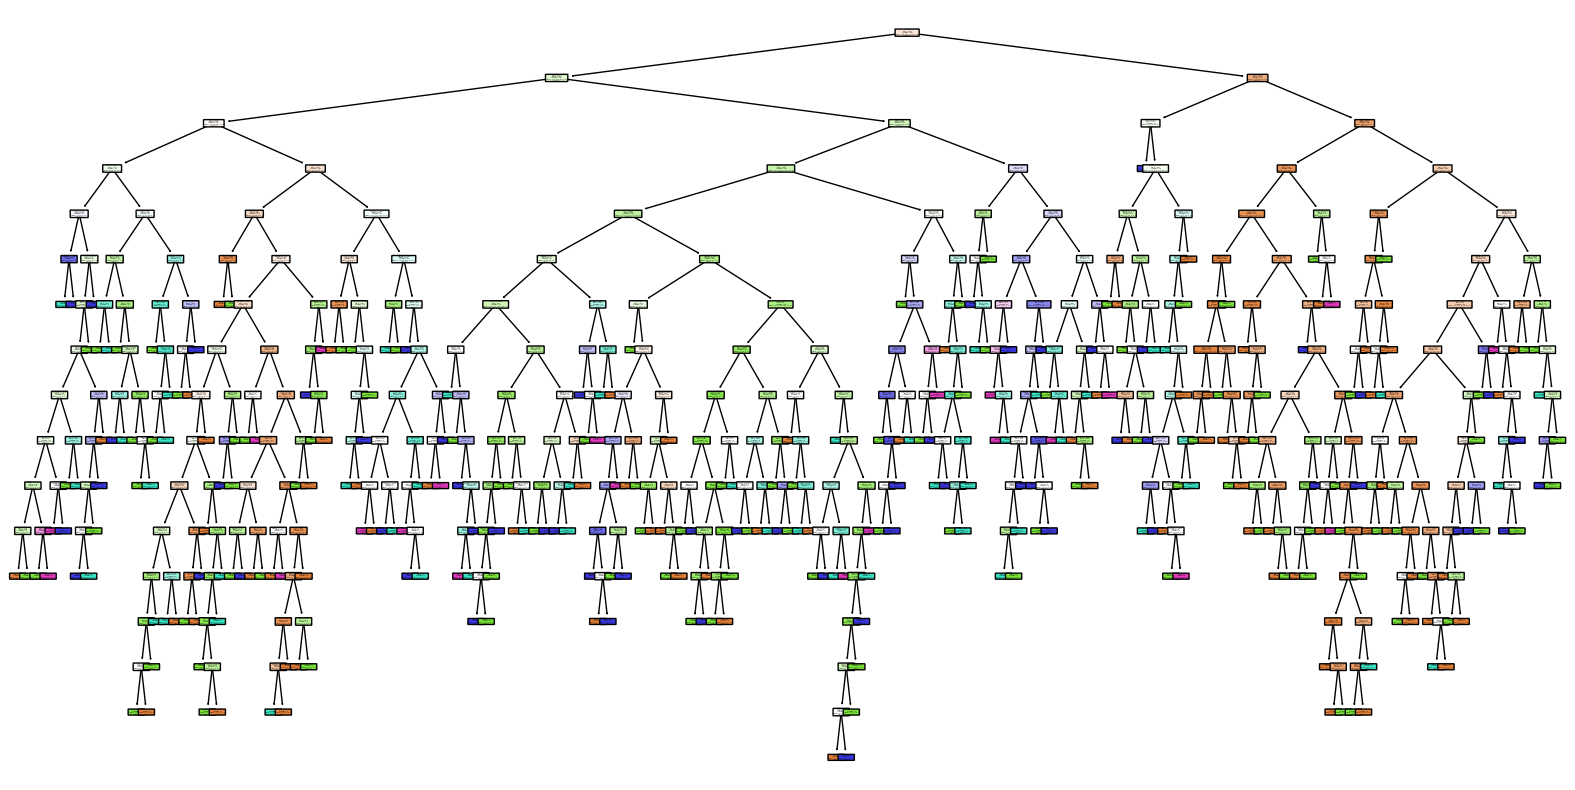

In [118]:
plt.figure(figsize=(20,10))
plot_tree(
    DT,
    feature_names=X.columns,
    class_names=class_names,
    filled=True,
    rounded=True
)
plt.show()


This tree will be very complex and hard to read.

In [123]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(Y_test, Y_pred_test))
print("Precision:", precision_score(Y_test, Y_pred_test, average='weighted'))
print("Recall:", recall_score(Y_test, Y_pred_test, average='weighted'))
print("F1-score:", f1_score(Y_test, Y_pred_test, average='weighted'))

Accuracy: 0.489010989010989
Precision: 0.5164835164835165
Recall: 0.489010989010989
F1-score: 0.49829137509877824


The Decision Tree model shows **poor performance**, with accuracy and F1-score around **0.5**, indicating limited predictive capability and the need for tuning or more robust models.

In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


In [125]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


In [126]:
dt = DecisionTreeClassifier(random_state=42)

grid = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid.fit(X_train, Y_train)


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [127]:
print("Best Parameters:", grid.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [130]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Y_pred = DT.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred, average='weighted'))
print("Recall:", recall_score(Y_test, Y_pred, average='weighted'))
print("F1-score:", f1_score(Y_test, Y_pred,average='weighted'))

Accuracy: 0.43956043956043955
Precision: 0.4575639508869322
Recall: 0.43956043956043955
F1-score: 0.447442840469894



# 
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Ans: 
Decision Tree hyperparameters control model complexity, bias–variance tradeoff, and class balance handling, directly influencing accuracy and generalization.

2. What is the difference between the Label encoding and One-hot encoding?

Ans: 
Label Encoding converts each category into a unique integer (e.g., Male → 0, Female → 1), which is simple and memory-efficient but may introduce an artificial order between categories.

One-Hot Encoding converts each category into a separate binary column (e.g., Gender_Male, Gender_Female), avoiding any ordinal relationship but increasing the dimensionality of the dataset.

In summary: Label Encoding is suitable for ordinal or binary features, while One-Hot Encoding is preferred for nominal categorical features where no natural order exists.